In [1]:
import scib_metrics

In [2]:
# !pip install pip install scib-metrics

In [3]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import seaborn as sns
import tangram as tg
import gc
import scipy
sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

%load_ext autoreload
%autoreload 2
%matplotlib inline

scanpy==1.9.5 anndata==0.9.2 umap==0.5.4 numpy==1.22.0 scipy==1.10.1 pandas==1.5.0 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.10
squidpy==1.2.3


In [4]:
def evaluate_nmi_ari(adata, label = 'scClassify'):
    labels = np.array(list(adata.obs[label]))
    result1 = scib_metrics.nmi_ari_cluster_labels_leiden(adata.obsp['connectivities'], labels = labels, n_jobs = -1)
    result2 = scib_metrics.silhouette_label(adata.obsm['X_pca'], labels = labels, rescale=True, chunk_size=256)
    print(result1)
    print(result2)
    return result1, result2

In [5]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_breast/gimvi_humanbreast_allgenes.h5ad")

In [6]:
adata.X

array([[ 0.20254023,  0.30601758,  0.10585814, ...,  2.3661492 ,
         8.544655  ,  8.218098  ],
       [ 0.10715415,  0.16316862,  0.09168859, ...,  0.65010256,
         3.13201   ,  2.008271  ],
       [ 0.08334071,  0.11294998,  0.05792414, ...,  0.6170233 ,
         2.6493986 ,  2.078829  ],
       ...,
       [ 0.8442573 ,  1.0011429 ,  0.4893148 , ...,  6.035846  ,
        28.550766  , 21.52731   ],
       [ 0.32463062,  0.3534905 ,  0.21856806, ...,  1.7279971 ,
         7.8587437 ,  6.0335126 ],
       [ 0.7646936 ,  0.9529116 ,  0.4659785 , ...,  6.087984  ,
        28.268152  , 21.586943  ]], dtype=float32)

In [7]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [8]:
adata = adata[:, adata.var['highly_variable']]

In [9]:
sc.pp.scale(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)

In [10]:
evaluate_nmi_ari(adata, label = 'scClassify')

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


{'nmi': 0.6860994665642707, 'ari': 0.5834880995420483}
0.56838109344244


({'nmi': 0.6860994665642707, 'ari': 0.5834880995420483}, 0.56838109344244)

In [12]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/tangram_breast_batch_uniform_new.h5ad")

In [13]:
adata

AnnData object with n_obs × n_vars = 160254 × 17696
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'total_transciprts', 'total_genes', 'sizeFactor', 'elongation', 'compactness', 'eccentricity', 'sphericity', 'solidity', 'convexity', 'circularity', 'density', 'scClassify', 'mean_cor_correlation', 'mean_celltype_correlation', 'mean_cor_cosine', 'mean_celltype_cosine', 'prop_detected_cor_correlation', 'prop_detected_celltype_correlation', 'prop_detected_cor_cosine', 'prop_detected_celltype_cosine', 'positive_F1', 'positive_Precision', 'positive_Recall', 'negative_F1', 'negative_Precision', 'negative_Recall', 'positive_exprsPct', 'negative_exprsPct', 'x_bin_groups', 'y_bin_groups', 'bin_groups', 'graph_cluster_anno', 'uniform_density', 'rna_count_based_density'

In [14]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [15]:
adata = adata[:, adata.var['highly_variable']]

In [16]:
sc.pp.scale(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)

In [17]:
evaluate_nmi_ari(adata, label = 'scClassify')

{'nmi': 0.5461318443167341, 'ari': 0.41792972901052}
0.5091183874756098


({'nmi': 0.5461318443167341, 'ari': 0.41792972901052}, 0.5091183874756098)

In [6]:
adata_spage = sc.read("/gpfs/gibbs/pi/zhao/tl688/tangram/SpaGE/spage_imputation_humanbreast_allgenes_seed0.csv")

In [7]:
adata_spage.var_names

Index(['', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4', 'ISG15',
       'AGRN', 'RNF223',
       ...
       'MT-ND2', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=18083)

In [8]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_breast/gimvi_humanbreast_allgenes.h5ad")

In [9]:
adata_spage.obs_names.values.astype('int')

array([     0,      1,      2, ..., 149862, 149863, 149864])

In [10]:
adata = adata[adata_spage.obs_names.values.astype('int'),:]

In [11]:
adata.X = adata_spage.X[:,1:]

In [12]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [13]:
adata = adata[:, adata.var['highly_variable']]

In [14]:
sc.pp.scale(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)

In [15]:
evaluate_nmi_ari(adata, label = 'scClassify')

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


{'nmi': 0.5944817439965316, 'ari': 0.5192331194506528}
0.6021301299333572


({'nmi': 0.5944817439965316, 'ari': 0.5192331194506528}, 0.6021301299333572)

In [16]:
a = 1

In [5]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_breast/gimvigat_humanbreast_allgenes.h5ad")

In [6]:
# sc.pp.normalize_per_cell(adata)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [7]:
adata = adata[:, adata.var['highly_variable']]

In [8]:
sc.pp.scale(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)

In [9]:
evaluate_nmi_ari(adata, label = 'scClassify')

No GPU/TPU found, falling back to CPU. (Set TF_CPP_MIN_LOG_LEVEL=0 and rerun for more info.)


{'nmi': 0.6948148162094291, 'ari': 0.5771220739759374}
0.5953058153390884


({'nmi': 0.6948148162094291, 'ari': 0.5771220739759374}, 0.5953058153390884)

In [73]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_smfish/spatial_data.h5ad")

In [74]:
adata.X

array([[35, 41,  0, ...,  0,  4,  3],
       [16, 26,  1, ...,  0, 21,  3],
       [95, 49,  5, ...,  0,  4,  1],
       ...,
       [ 3,  0,  0, ...,  0,  7,  0],
       [ 4,  0,  2, ...,  0,  2,  1],
       [ 3,  1,  0, ...,  1, 10,  2]])

In [63]:
# sc.pp.normalize_per_cell(adata)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
# sc.pp.highly_variable_genes(adata, n_top_genes=2000)

In [64]:
# adata = adata[:, adata.var['highly_variable']]

In [65]:
sc.pp.scale(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)

In [66]:
evaluate_nmi_ari(adata, label = 'scClassify')

{'nmi': 0.4137471553458417, 'ari': 0.4211270763225503}
0.5333281047642231


({'nmi': 0.4137471553458417, 'ari': 0.4211270763225503}, 0.5333281047642231)

In [5]:
import scanpy as sc
import squidpy as sq
import NaiveDE
import SpatialDE

sc.settings.verbosity = 3
sc.settings.set_figure_params(dpi=80, facecolor="white")

In [82]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_smfish/spatial_data.h5ad")

In [92]:
adata

AnnData object with n_obs × n_vars = 4530 × 33
    obs: 'x_coord', 'y_coord', 'labels', 'str_labels', 'batch', 'scClassify'
    uns: 'spatial_neighbors', 'moranI'
    obsm: 'spatial'
    obsp: 'spatial_connectivities', 'spatial_distances'

In [83]:
spatial_index = [list(adata.obs['x_coord']), list(adata.obs['y_coord'])]
adata.obsm['spatial'] = np.array(spatial_index).T.astype('int')

In [84]:
sq.gr.spatial_neighbors(adata)
sq.gr.spatial_autocorr(adata, mode="moran", genes=adata.var_names)

Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `None` permutations using `1` core(s)
Adding `adata.uns['moranI']`
Finish (0:00:00)


In [93]:
adata.uns["moranI"]

,I,pval_norm,var_norm,pval_norm_fdr_bh
Rorb,0.624328,0.000000e+00,0.000076,0.000000e+00
Gfap,0.460735,0.000000e+00,0.000076,0.000000e+00
Lamp5,0.448694,0.000000e+00,0.000076,0.000000e+00
Sox10,0.447866,0.000000e+00,0.000076,0.000000e+00
Plp1,0.430108,0.000000e+00,0.000076,0.000000e+00
Syt6,0.414510,0.000000e+00,0.000076,0.000000e+00
Cpne5,0.381451,0.000000e+00,0.000076,0.000000e+00
Kcnip2,0.331815,0.000000e+00,0.000076,0.000000e+00
Vtn,0.302988,0.000000e+00,0.000076,0.000000e+00
Acta2,0.270975,0.000000e+00,0.000076,0.000000e+00


In [19]:
from collections import Counter

In [97]:
dict(Counter(adata.uns["moranI"]['pval_norm']<0.05))[True]

33

In [10]:
def calculate_moranI_proportion(adata):
    from collections import Counter
    sq.gr.spatial_neighbors(adata)
    sq.gr.spatial_autocorr(adata, mode="moran", genes=adata.var_names)
    return dict(Counter(adata.uns["moranI"]['pval_norm_fdr_bh']<0.05))[True]/len(adata.var_names)

In [108]:
adata_spage = sc.read("/gpfs/gibbs/pi/zhao/tl688/tangram/SpaGE/spage_imputation_smfish_allgenes_seed0.csv", cache=True)

... writing an h5ad cache file to speedup reading next time


In [109]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_smfish_cluster/smfish_data_allgenes_500_0_seed0.h5ad")

In [110]:
spatial_index = [list(adata.obs['x_coord']), list(adata.obs['y_coord'])]
adata.obsm['spatial'] = np.array(spatial_index).T.astype('int')

In [111]:
adata.X = adata_spage.X[:,1:]

In [112]:
calculate_moranI_proportion(adata)

Creating graph using `generic` coordinates and `None` transform and `1` libraries.
Adding `adata.obsp['spatial_connectivities']`
       `adata.obsp['spatial_distances']`
       `adata.uns['spatial_neighbors']`
Finish (0:00:00)
Calculating moran's statistic for `None` permutations using `1` core(s)
Adding `adata.uns['moranI']`
Finish (0:00:00)


0.9991988784298017

In [25]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/tangram_breast_batch_uniform_new.h5ad")

In [26]:

adata.obsm['spatial'] = adata_raw.obsm['coord']

In [27]:
calculate_moranI_proportion(adata)

0.9426424050632911

In [6]:
adata_spage = sc.read("/gpfs/gibbs/pi/zhao/tl688/tangram/SpaGE/spage_imputation_humanbreast_allgenes_seed0.csv")

In [7]:
adata_spage.var_names

Index(['', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4', 'ISG15',
       'AGRN', 'RNF223',
       ...
       'MT-ND2', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=18083)

In [8]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_breast/gimvi_humanbreast_allgenes.h5ad")

In [9]:
adata_spage.obs_names.values.astype('int')

array([     0,      1,      2, ..., 149862, 149863, 149864])

In [10]:
adata = adata[adata_spage.obs_names.values.astype('int'),:]

In [ ]:
adata_raw = sc.read_h5ad("/gpfs/gibbs/pi/zhao/yl2687/data/spatial_fish_data/xenium_breast/spe_xenium_withMetrics.h5ad")

In [14]:
adata_raw_new = adata_raw[adata_spage.obs_names.values.astype('int'),:]

In [15]:
adata.X = adata_spage.X[:,1:]

In [16]:
adata.obsm['spatial'] = adata_raw_new.obsm['coord']

In [13]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_breast/gimvigat_humanbreast_allgenes.h5ad")

In [14]:
# adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_breast/gimvi_humanbreast_allgenes.h5ad")

In [16]:
adata_raw = sc.read_h5ad("/gpfs/gibbs/pi/zhao/yl2687/data/spatial_fish_data/xenium_breast/spe_xenium_withMetrics.h5ad")

In [17]:

adata.obsm['spatial'] = adata_raw.obsm['coord']

In [24]:
calculate_moranI_proportion(adata)

1.0

In [ ]:
from collections import Counter
sq.gr.spatial_neighbors(adata)
sq.gr.spatial_autocorr(adata, mode="moran", genes=adata.var_names)
print(dict(Counter(adata.uns["moranI"]['pval_norm_fdr_bh']<0.05)))
dict(Counter(adata.uns["moranI"]['pval_norm_fdr_bh']<0.05))[True]/len(adata.var_names)
adata.uns["moranI"]['pval_norm_fdr_bh']

In [12]:
adata.uns["moranI"]

,I,pval_norm,var_norm,pval_norm_fdr_bh
PTGDS,0.674471,0.0,0.000002,0.0
PTPRN2,0.673041,0.0,0.000002,0.0
GZMB,0.672671,0.0,0.000002,0.0
CEACAM6,0.671878,0.0,0.000002,0.0
AGR2,0.671049,0.0,0.000002,0.0
...,...,...,...,...
AL121578.2,0.167714,0.0,0.000002,0.0
TNFRSF17,0.166932,0.0,0.000002,0.0
TXNDC5,0.158421,0.0,0.000002,0.0
DERL3,0.155583,0.0,0.000002,0.0


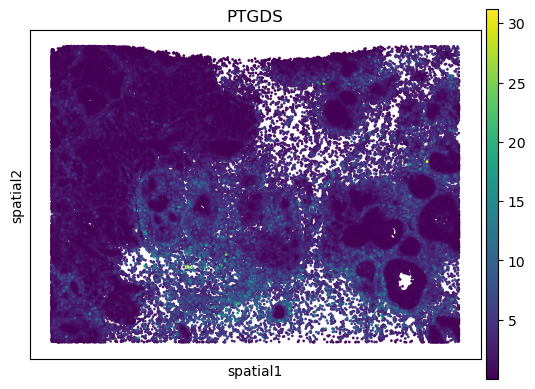

In [18]:
sc.pl.spatial(adata,color = 'PTGDS', spot_size = 50)

In [6]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_breast/gimvigat_humanbreast_allgenes.h5ad")

In [7]:
adata

AnnData object with n_obs × n_vars = 160254 × 18082
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'total_transciprts', 'total_genes', 'sizeFactor', 'elongation', 'compactness', 'eccentricity', 'sphericity', 'solidity', 'convexity', 'circularity', 'density', 'scClassify', 'mean_cor_correlation', 'mean_celltype_correlation', 'mean_cor_cosine', 'mean_celltype_cosine', 'prop_detected_cor_correlation', 'prop_detected_celltype_correlation', 'prop_detected_cor_cosine', 'prop_detected_celltype_cosine', 'positive_F1', 'positive_Precision', 'positive_Recall', 'negative_F1', 'negative_Precision', 'negative_Recall', 'positive_exprsPct', 'negative_exprsPct', 'x_bin_groups', 'y_bin_groups', 'bin_groups', 'names', 'ind_x', '_scvi_batch', '_scvi_labels', '_scvi_ind_x'
    var: 'ID', 'Symbol', 'Type'
    obsm: 'imputed', 'imputed_raw', 'imputed_raw_theta'

In [8]:
adata_raw = sc.read_h5ad("/gpfs/gibbs/pi/zhao/yl2687/data/spatial_fish_data/xenium_breast/spe_xenium_withMetrics.h5ad")

In [9]:

adata.obsm['spatial'] = adata_raw.obsm['coord']

In [11]:
del adata_raw

In [15]:
calculate_moranI_proportion(adata)

1.0

In [12]:
# sc.pp.calculate_qc_metrics(adata, inplace=True)
# counts = sc.get.obs_df(adata, keys=list(adata.var_names), use_raw=False)
# total_counts = sc.get.obs_df(adata, keys=["total_counts"])
# norm_expr = NaiveDE.stabilize(counts.T).T
# resid_expr = NaiveDE.regress_out(total_counts, norm_expr.T, "np.log(total_counts)").T

In [13]:
# sample_resid_expr = resid_expr.sample(n=10, axis=1, random_state=1)

In [ ]:
# results = SpatialDE.run(adata.obsm["spatial"], sample_resid_expr)
# top10 = results.sort_values("qval")[["g", "l", "qval"]]
# print(top10)

In [6]:
def create_spatialde_proportion(adata):
    sc.pp.calculate_qc_metrics(adata, inplace=True)
    counts = sc.get.obs_df(adata, keys=list(adata.var_names), use_raw=False)
    total_counts = sc.get.obs_df(adata, keys=["total_counts"])
    norm_expr = NaiveDE.stabilize(counts.T).T
    resid_expr = NaiveDE.regress_out(total_counts, norm_expr.T, "np.log(total_counts)").T
    sample_resid_expr = resid_expr.sample(n=100, axis=1, random_state=1)
    results = SpatialDE.run(adata.obsm["spatial"], sample_resid_expr)
    top10 = results.sort_values("qval")[["g", "l", "qval"]]
    print(top10)
    return dict(Counter(top10['qval']<0.05))[True] / 100

In [6]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_breast/gimvi_humanbreast_allgenes.h5ad")

In [7]:
adata_raw = sc.read_h5ad("/gpfs/gibbs/pi/zhao/yl2687/data/spatial_fish_data/xenium_breast/spe_xenium_withMetrics.h5ad")

In [8]:

adata.obsm['spatial'] = adata_raw.obsm['coord']

In [ ]:
create_spatialde_proportion(adata)

In [179]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_smfish_cluster/gimvi_smfish_allgenes.h5ad")

In [180]:
spatial_index = [list(adata.obs['x_coord']), list(adata.obs['y_coord'])]
adata.obsm['spatial'] = np.array(spatial_index).T.astype('int')

In [181]:
create_spatialde_proportion(adata)

Performing DE test
Pre-calculating USU^T = K's ...
Done: 2.6e+02s
Fitting gene models


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Finished fitting 10 models to 1000 genes


1.0

In [182]:
adata_spage = sc.read("/gpfs/gibbs/pi/zhao/tl688/tangram/SpaGE/spage_imputation_smfish_allgenes_seed0.csv", cache=True)

... reading from cache file cache/gpfs-gibbs-pi-zhao-tl688-tangram-SpaGE-spage_imputation_smfish_allgenes_seed0.h5ad


In [183]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_smfish_cluster/gimvi_smfish_allgenes.h5ad")

In [184]:
spatial_index = [list(adata.obs['x_coord']), list(adata.obs['y_coord'])]
adata.obsm['spatial'] = np.array(spatial_index).T.astype('int')

In [185]:
adata.X = adata_spage.X[:,1:]

In [186]:
create_spatialde_proportion(adata)

Performing DE test
Pre-calculating USU^T = K's ...
Done: 2.7e+02s
Fitting gene models


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Finished fitting 10 models to 1000 genes


1.0

In [187]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_smfish_cluster/smfish_data_allgenes_500_0_seed0.h5ad")

In [188]:
spatial_index = [list(adata.obs['x_coord']), list(adata.obs['y_coord'])]
adata.obsm['spatial'] = np.array(spatial_index).T.astype('int')

In [189]:
create_spatialde_proportion(adata)

Performing DE test
Pre-calculating USU^T = K's ...
Done: 2.7e+02s
Fitting gene models


Models:   0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

  0%|          | 0/1000 [00:00<?, ?it/s]

Finished fitting 10 models to 1000 genes


0.672

# Cell-cell communication evaluation

In [20]:
import scib_metrics

In [21]:
# !pip install pip install scib-metrics

In [22]:
import scanpy as sc
import squidpy as sq
import numpy as np
import pandas as pd
from anndata import AnnData
import pathlib
import matplotlib.pyplot as plt
import matplotlib as mpl
import skimage
import seaborn as sns
import tangram as tg
import gc
import scipy
sc.logging.print_header()
print(f"squidpy=={sq.__version__}")

%load_ext autoreload
%autoreload 2
%matplotlib inline

scanpy==1.9.5 anndata==0.9.2 umap==0.5.4 numpy==1.22.0 scipy==1.10.1 pandas==1.5.0 scikit-learn==1.3.1 statsmodels==0.14.0 igraph==0.10.8 pynndescent==0.5.10
squidpy==1.2.3
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [8]:
adata = sc.read("/gpfs/gibbs/pi/zhao/tl688/tangram/tangram_breast_batch_uniform_new.h5ad")

In [9]:
res = sq.gr.ligrec(
    adata,
    n_perms=1000,
    cluster_key="scClassify",
    copy=True,
    use_raw=False,
    transmitter_params={"categories": "ligand"},
    receiver_params={"categories": "receptor"},
)

  0%|          | 0/1000 [00:00<?, ?permutation/s]

In [10]:
# !pip install pandas==1.5.0

In [11]:
res['pvalues'].shape

(8611, 324)

In [12]:
np.mean((res['pvalues'].values<0.05)*1)

0.3089584668476009

In [13]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_breast/gimvi_humanbreast_allgenes.h5ad")

In [14]:
res = sq.gr.ligrec(
    adata,
    n_perms=1000,
    cluster_key="scClassify",
    copy=True,
    use_raw=False,
    transmitter_params={"categories": "ligand"},
    receiver_params={"categories": "receptor"},
)

  0%|          | 0/1000 [00:00<?, ?permutation/s]

In [15]:
res['pvalues'].shape

(8744, 324)

In [16]:
np.mean((res['pvalues'].values<0.05)*1)

0.3643030706064405

In [14]:
adata_spage = sc.read("/gpfs/gibbs/pi/zhao/tl688/tangram/SpaGE/spage_imputation_smfish_allgenes_seed0.csv", cache=True)

In [15]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_smfish_cluster/smfish_data_allgenes_500_0_seed0.h5ad")

In [19]:
adata.X = adata_spage.X[:,1:]

In [20]:
res = sq.gr.ligrec(
    adata,
    n_perms=1000,
    cluster_key="scClassify",
    copy=True,
    use_raw=False,
    transmitter_params={"categories": "ligand"},
    receiver_params={"categories": "receptor"},
)

  0%|          | 0/1000 [00:00<?, ?permutation/s]

In [21]:
res['pvalues'].shape

(6897, 36)

In [22]:
np.mean((res['pvalues'].values<0.05)*1)

0.28958242714223575

In [8]:
adata_spage = sc.read("/gpfs/gibbs/pi/zhao/tl688/tangram/SpaGE/spage_imputation_humanbreast_allgenes_seed0.csv")

In [9]:
adata_spage.var_names

Index(['', 'SAMD11', 'NOC2L', 'KLHL17', 'PLEKHN1', 'PERM1', 'HES4', 'ISG15',
       'AGRN', 'RNF223',
       ...
       'MT-ND2', 'MT-CO2', 'MT-ATP6', 'MT-CO3', 'MT-ND3', 'MT-ND4L', 'MT-ND4',
       'MT-ND5', 'MT-ND6', 'MT-CYB'],
      dtype='object', length=18083)

In [10]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_breast/gimvi_humanbreast_allgenes.h5ad")

In [11]:
adata_spage.obs_names.values.astype('int')

array([     0,      1,      2, ..., 149862, 149863, 149864])

In [12]:
adata = adata[adata_spage.obs_names.values.astype('int'),:]

In [13]:
adata.X = adata_spage.X[:,1:]

In [14]:
res = sq.gr.ligrec(
    adata,
    n_perms=1000,
    cluster_key="scClassify",
    copy=True,
    use_raw=False,
    transmitter_params={"categories": "ligand"},
    receiver_params={"categories": "receptor"},
)

  0%|          | 0/1000 [00:00<?, ?permutation/s]

In [15]:
res['pvalues'].shape

(8703, 324)

In [16]:
np.mean((res['pvalues'].values<0.05)*1)

0.19997432416521618

In [24]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_breast/gimvigat_humanbreast_allgenes.h5ad")

In [25]:
adata

AnnData object with n_obs × n_vars = 160254 × 18082
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'total_transciprts', 'total_genes', 'sizeFactor', 'elongation', 'compactness', 'eccentricity', 'sphericity', 'solidity', 'convexity', 'circularity', 'density', 'scClassify', 'mean_cor_correlation', 'mean_celltype_correlation', 'mean_cor_cosine', 'mean_celltype_cosine', 'prop_detected_cor_correlation', 'prop_detected_celltype_correlation', 'prop_detected_cor_cosine', 'prop_detected_celltype_cosine', 'positive_F1', 'positive_Precision', 'positive_Recall', 'negative_F1', 'negative_Precision', 'negative_Recall', 'positive_exprsPct', 'negative_exprsPct', 'x_bin_groups', 'y_bin_groups', 'bin_groups', 'names', 'ind_x', '_scvi_batch', '_scvi_labels', '_scvi_ind_x'
    var: 'ID', 'Symbol', 'Type'
    obsm: 'imputed', 'imputed_raw', 'imputed_raw_theta'

In [26]:
sc.pp.normalize_per_cell(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, n_top_genes=100)

In [27]:
adata = adata[:, adata.var['highly_variable']]

In [21]:
res = sq.gr.ligrec(
    adata,
    n_perms=1000,
    cluster_key="scClassify",
    copy=True,
    use_raw=False,
    transmitter_params={"categories": "ligand"},
    receiver_params={"categories": "receptor"},
)

  0%|          | 0/1000 [00:00<?, ?permutation/s]

In [22]:
res['pvalues'].shape

(8725, 324)

In [23]:
np.mean((res['pvalues'].values<0.05)*1)

0.321738299904489

In [11]:
set(adata.obs['scClassify'])

{'ACTA2+ Myoepi',
 'B Cells',
 'CD163+ Macrophage',
 'CD4 T',
 'CD8 T',
 'CRABP2+ Malignant',
 'ECM1+ Malignant',
 'Firoblast',
 'IRF7+ DC',
 'KRT15+ Myoepi',
 'LAMP3+ DC',
 'Macrophage',
 'Mast cells',
 'Plasma',
 'SCGB2A2+ Malignant',
 'STAB2+ Endothelial',
 'VWF+ Endothelial',
 'unassigned'}

In [28]:
label_list = ['CRABP2+ Malignant',
 'ECM1+ Malignant',
'B Cells',
 'CD163+ Macrophage',
 'CD4 T',
 'CD8 T',
 'SCGB2A2+ Malignant',]

In [29]:
adata = adata[[True if i in label_list else False for i in adata.obs['scClassify']  ]]

In [30]:
res = sq.gr.ligrec(
    adata,
    n_perms=1000,
    cluster_key="scClassify",
    copy=True,
    use_raw=False,
    transmitter_params={"categories": "ligand"},
    receiver_params={"categories": "receptor"},
)

  0%|          | 0/1000 [00:00<?, ?permutation/s]

In [31]:
res

{'means': cluster_1        B Cells                                        \
 cluster_2        B Cells CD163+ Macrophage     CD4 T     CD8 T   
 source target                                                    
 KDR    PECAM1   0.244942          0.430937  0.276454  0.272050   
 GZMA   F2RL2    0.204369          0.250258  0.202625  0.219205   
 KDR    CDH5     0.171531          0.205050  0.198466  0.189820   
 PTN    PTPRB    0.112741          0.135841  0.130350  0.134118   
 MMRN2  CD93     0.109732          0.385240  0.150213  0.134376   
 CD34   SELL     0.627872          0.206488  0.455558  0.349907   
 MMRN2  CLEC14A  0.043258          0.063398  0.060139  0.060874   
 
 cluster_1                                                            \
 cluster_2      CRABP2+ Malignant ECM1+ Malignant SCGB2A2+ Malignant   
 source target                                                         
 KDR    PECAM1           0.063737        0.066759           0.053055   
 GZMA   F2RL2            0.1524

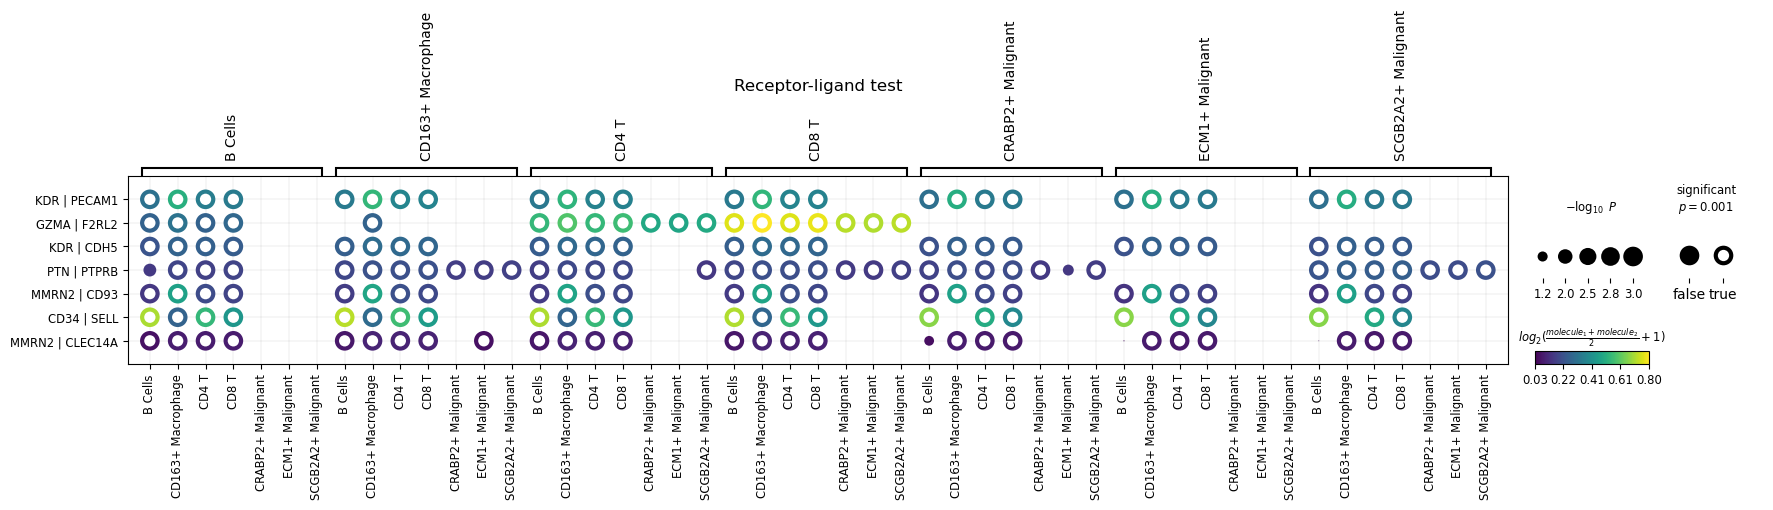

In [32]:
sq.pl.ligrec(res, cluster_key='scClassify', save = 'humanbreast_select_cellclusters_100.pdf', dpi=100)

# Plot data

In [8]:
adata = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/tangram/data_breast/gimvigat_humanbreast_allgenes.h5ad")

In [9]:
adata_raw = sc.read_h5ad("/gpfs/gibbs/pi/zhao/yl2687/data/spatial_fish_data/xenium_breast/spe_xenium_withMetrics.h5ad")

In [10]:
adata_raw

AnnData object with n_obs × n_vars = 160254 × 313
    obs: 'cell_id', 'transcript_counts', 'control_probe_counts', 'control_codeword_counts', 'total_counts', 'cell_area', 'nucleus_area', 'sample_id', 'total_transciprts', 'total_genes', 'sizeFactor', 'elongation', 'compactness', 'eccentricity', 'sphericity', 'solidity', 'convexity', 'circularity', 'density', 'scClassify', 'mean_cor_correlation', 'mean_celltype_correlation', 'mean_cor_cosine', 'mean_celltype_cosine', 'prop_detected_cor_correlation', 'prop_detected_celltype_correlation', 'prop_detected_cor_cosine', 'prop_detected_celltype_cosine', 'positive_F1', 'positive_Precision', 'positive_Recall', 'negative_F1', 'negative_Precision', 'negative_Recall', 'positive_exprsPct', 'negative_exprsPct', 'x_bin_groups', 'y_bin_groups', 'bin_groups'
    var: 'ID', 'Symbol', 'Type', 'total_cells', 'meanExprsPct_cells'
    uns: 'CellSPA', 'X_name'
    obsm: 'PCA', 'UMAP', 'coord'
    layers: 'logcounts'

In [11]:
adata.obsm['X_spatial'] = adata_raw.obsm['coord']

In [12]:
seq_data = sc.read_h5ad("/gpfs/gibbs/pi/zhao/tl688/deconvdatasets/spatial_dataset/xenium_breast/sce_FFPE_full.h5ad")

In [13]:
# sc.pp.normalize_per_cell(adata)
sc.pp.normalize_total(seq_data)
sc.pp.log1p(seq_data)
sc.pp.highly_variable_genes(seq_data, n_top_genes=2000)

In [14]:
seq_data = seq_data[:, seq_data.var['highly_variable']]

In [16]:
seq_data.var_names

Index(['ISG15', 'TNFRSF18', 'TNFRSF4', 'MXRA8', 'VWA1', 'PRDM16', 'MEGF6',
       'KCNAB2', 'TNFRSF25', 'PLEKHG5',
       ...
       'CSAG1', 'PNMA3', 'TREX2', 'BGN', 'SSR4', 'FLNA', 'IL9R', 'PCDH11Y',
       'MT-ND1', 'MT-CO2'],
      dtype='object', length=2000)

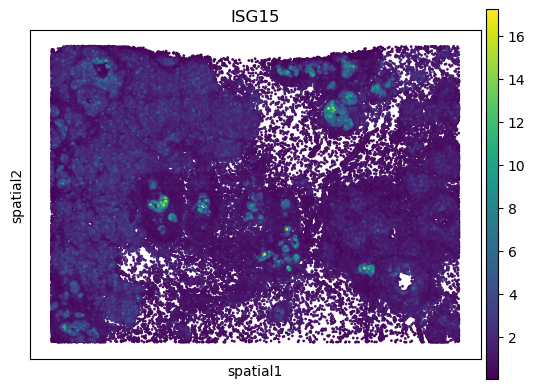

In [19]:
sc.pl.spatial(adata, color='ISG15', spot_size=50)